### CellStrat Hub Pack - Machine Learning

#### ML6 - Classification with Decision Trees (IRIS dataset)

In [19]:
# coding: utf-8

# **Decision Trees - basic tutorial**

# Source Credit : “Hands-on Machine Learning with Scikit-Learn and TensorFlow ” by Aurelien Geron

In [20]:
# # Setup

# First, let's make sure this notebook works well in both python 2 and 3, import a few common modules,
# ensure MatplotLib plots figures inline and prepare a function to save the figures:


# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [21]:
# Common imports
import numpy as np
import os

In [22]:
# to make this notebook's output stable across runs
np.random.seed(42)

In [23]:
# To plot pretty figures
#get_ipython().magic('matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

In [24]:
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [25]:
# # Training and visualizing


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [26]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [27]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

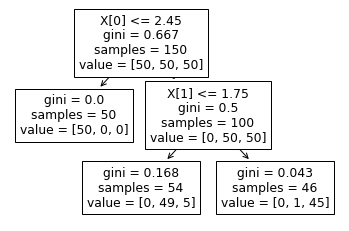

In [28]:
import sklearn.tree as tree

tree.plot_tree(tree_clf)

In [29]:
"""
from sklearn.tree import export_graphviz

# produce decision tree graph
dot_data = export_graphviz(
        tree_clf,
# commented by CellStrat
#       out_file=image_path("iris_tree.dot"),
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
"""

'\nfrom sklearn.tree import export_graphviz\n\n# produce decision tree graph\ndot_data = export_graphviz(\n        tree_clf,\n# commented by CellStrat\n#       out_file=image_path("iris_tree.dot"),\n        out_file=None,\n        feature_names=iris.feature_names[2:],\n        class_names=iris.target_names,\n        rounded=True,\n        filled=True\n    )\n'

In [30]:
"""
# added by CellStrat
# save decision tree graph to disk
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)
#plt.savefig()
#graph.write_png('tree.png', PROJECT_ROOT_DIR+"/images/decision_trees/")
#graph.write_png(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png")
graph.write_png('decisiontree.png')
# tree.png file is saved in the code directory
import matplotlib.image as mpimg
#plt.imshow(mpimg.imread('tree.png'))
#plt.imshow(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png"))
plt.show(plt.imshow(mpimg.imread('decisiontree.png')))
#plt.show(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png").all())
"""

'\n# added by CellStrat\n# save decision tree graph to disk\nfrom pydotplus import graph_from_dot_data\ngraph = graph_from_dot_data(dot_data)\n#plt.savefig()\n#graph.write_png(\'tree.png\', PROJECT_ROOT_DIR+"/images/decision_trees/")\n#graph.write_png(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png")\ngraph.write_png(\'decisiontree.png\')\n# tree.png file is saved in the code directory\nimport matplotlib.image as mpimg\n#plt.imshow(mpimg.imread(\'tree.png\'))\n#plt.imshow(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png"))\nplt.show(plt.imshow(mpimg.imread(\'decisiontree.png\')))\n#plt.show(mpimg.imread(PROJECT_ROOT_DIR+"/images/" + CHAPTER_ID + "/tree.png").all())\n'

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

<ipython-input-31-6de0e33f019f>:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


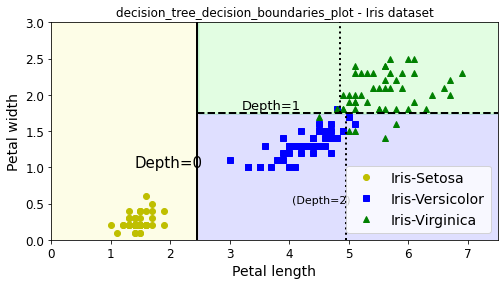

In [32]:
plt.figure(figsize=(8, 4))
# CellStrat : added legend=True variable)
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.title("decision_tree_decision_boundaries_plot - Iris dataset")

plt.savefig("decision_tree_decision_boundaries_plot")
plt.show()

In [33]:
# # Predicting classes and class probabilities

print("class probabilities for petal_len 1 cm and petal_width 0.5 cm :-")
print (tree_clf.predict_proba([[1, 0.5]]))

print("class name :- (0=Setosa, 1=Versicolor, 2=Virginica)")
print (tree_clf.predict([[1, 0.5]]))

class probabilities for petal_len 1 cm and petal_width 0.5 cm :-
[[1. 0. 0.]]
class name :- (0=Setosa, 1=Versicolor, 2=Virginica)
[0]
